# ============================================================
# Exploratory Data Analysis (EDA)
# ============================================================


This section performs an in-depth exploration of the air quality dataset 
to understand its structure, detect anomalies, and extract meaningful insights.

The analysis includes:
1. Data Overview – structure, columns, and missing values
2. Datetime Feature Engineering – extraction of year, month, day, and hour
3. AQI Trends – distribution and time-series variation of AQI
4. Pollutant Distributions – statistical and visual exploration
5. Correlation Analysis – relationships among pollutants and AQI
6. Temporal Behavior – monthly, hourly, and seasonal AQI variations
7. Pollutant–AQI Relationships – regression-based pollutant effects
8. Outlier Detection – identifying extreme pollutant values



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
pd.set_option('display.max_columns', None)

In [10]:
df = pd.read_csv("data/merged_aqi_data.csv")


In [11]:
df.head()

,datetime,ow_aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2024-10-17 09:00:00,3.0,821.11,5.20,23.31,83.68,5.13,34.88,66.39,6.27
1,2024-10-17 10:00:00,3.0,781.06,5.25,23.65,75.82,4.65,32.35,65.48,5.70
2,2024-10-17 11:00:00,3.0,727.65,4.47,23.31,67.95,4.35,30.07,65.60,5.00
3,2024-10-17 12:00:00,3.0,694.27,2.88,25.70,59.37,4.11,29.03,65.41,4.50
4,2024-10-17 13:00:00,3.0,774.38,0.64,36.33,42.56,4.41,29.13,63.89,4.56


In [4]:

print("Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())

print("\nBasic Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())


Shape: (7171, 10)

Columns:
['datetime', 'ow_aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7171 entries, 0 to 7170
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  7171 non-null   object 
 1   ow_aqi    7171 non-null   float64
 2   co        7171 non-null   float64
 3   no        7171 non-null   float64
 4   no2       7171 non-null   float64
 5   o3        7171 non-null   float64
 6   so2       7171 non-null   float64
 7   pm2_5     7171 non-null   float64
 8   pm10      7171 non-null   float64
 9   nh3       7171 non-null   float64
dtypes: float64(9), object(1)
memory usage: 560.4+ KB
None

Missing Values:
datetime    0
ow_aqi      0
co          0
no          0
no2         0
o3          0
so2         0
pm2_5       0
pm10        0
nh3         0
dtype: int64


### Dataset Overview
- **Rows:** 7,171  
- **Columns:** 10  

Each record represents an air quality measurement with pollutant concentrations and overall AQI.

**Key Points:**
- No missing values — dataset is clean.  
- `datetime` column → stored as string; needs conversion to `datetime`.  
- Remaining 9 columns are numeric (continuous pollutant values + `ow_aqi`).  

In [23]:
df.describe()

,datetime,ow_aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,year,month,day,hour
count,7171,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000
mean,2025-04-19 07:48:12.650955264,3.490990,936.238271,4.679561,25.023782,62.505372,10.361963,63.699138,121.190530,9.081381,2024.787059,6.636592,15.906150,11.508437
min,2024-10-17 09:00:00,1.000000,68.220000,0.000000,0.020000,0.000000,0.060000,0.000000,0.000000,0.000000,2024.000000,1.000000,1.000000,0.000000
25%,2025-01-15 01:30:00,3.000000,84.295000,0.000000,0.080000,42.070000,0.340000,17.220000,58.880000,0.000000,2025.000000,4.000000,9.000000,6.000000
50%,2025-04-23 00:00:00,3.000000,123.870000,0.000000,0.120000,51.600000,0.600000,29.930000,88.950000,0.000000,2025.000000,7.000000,16.000000,12.000000
75%,2025-07-21 16:30:00,4.000000,1054.760000,0.230000,32.220000,76.530000,14.420000,69.030000,149.580000,10.890000,2025.000000,10.000000,23.000000,18.000000
max,2025-10-19 19:00:00,5.555580,13671.880000,227.090000,444.170000,572.200000,118.260000,967.960000,1096.630000,135.780000,2025.000000,12.000000,31.000000,23.000000
std,NaN,1.136556,1627.189955,17.316781,44.890203,40.491348,16.752187,90.814194,108.579472,16.919533,0.409415,3.455575,8.652471,6.920794


In [16]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

print("New columns added: ['year', 'month', 'day', 'hour']\n")
print(df[['datetime', 'year', 'month', 'day', 'hour']].head())


New columns added: ['year', 'month', 'day', 'hour']

             datetime  year  month  day  hour
0 2024-10-17 09:00:00  2024     10   17     9
1 2024-10-17 10:00:00  2024     10   17    10
2 2024-10-17 11:00:00  2024     10   17    11
3 2024-10-17 12:00:00  2024     10   17    12
4 2024-10-17 13:00:00  2024     10   17    13


Datetime Feature Extraction
- `datetime` converted from string → proper datetime format.  
- Derived features added: **year**, **month**, **day**, **hour**.  

**Observations:**
- Data is **hourly and continuous**, capturing AQI & pollutant levels per hour.  
- Enables analysis at multiple temporal levels: hourly, monthly, and yearly.  

**Purpose:**
- Analyze hourly AQI fluctuations.  
- Examine seasonal/monthly pollutant variations.  
- Track long-term air quality trends.  


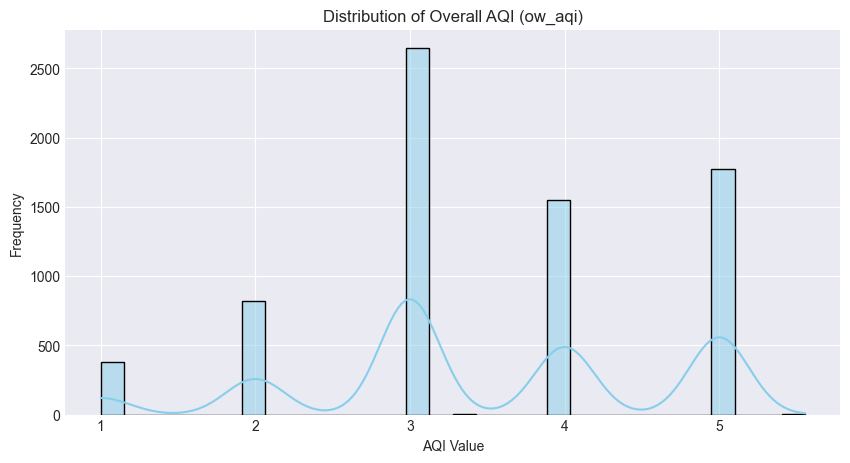

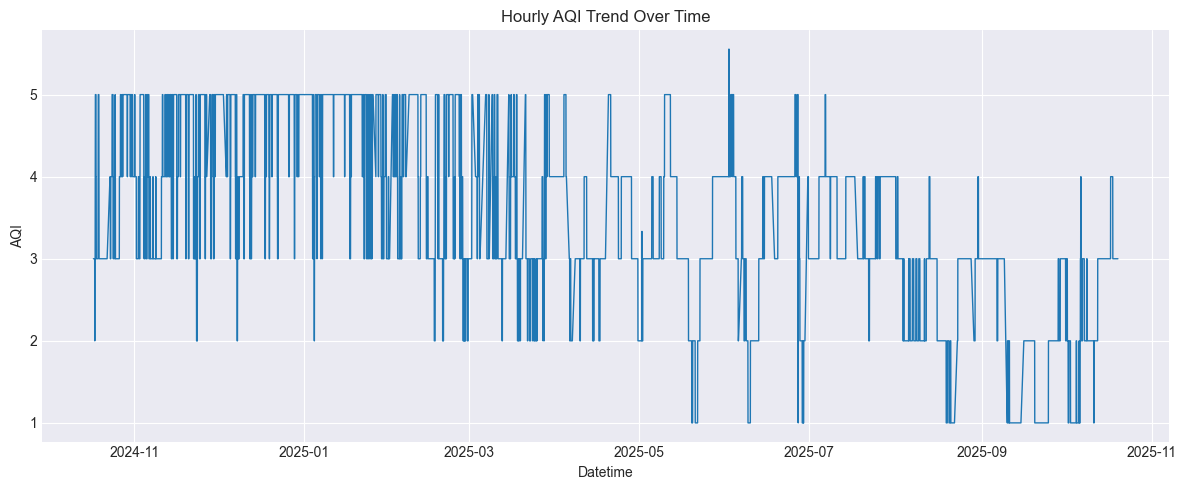

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df['ow_aqi'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Overall AQI (ow_aqi)')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(df['datetime'], df['ow_aqi'], linewidth=1)
plt.title('Hourly AQI Trend Over Time')
plt.xlabel('Datetime')
plt.ylabel('AQI')
plt.tight_layout()
plt.show()


### Interpretation of AQI Plots

**1. Distribution of Overall AQI (Top Plot):**
- The histogram shows that AQI values most frequently fall between **3 and 5**, indicating moderate to poor air quality.
- The low count at **AQI = 1** suggests very few periods of excellent air.
- The smooth KDE curve shows multiple peaks, meaning AQI changes across different times or seasons.

**2. Hourly AQI Trend Over Time (Bottom Plot):**
- AQI fluctuates strongly between **2 and 5** throughout the year.
- Frequent spikes up to **4–5** represent many high-pollution hours.
- Occasional dips to **1–2** indicate cleaner air moments, likely due to favorable weather.
- No visible long-term downward trend — overall air quality remains inconsistent.

**Summary:**  
Overall, the air quality is usually **moderate to poor**, with **occasional clean-air intervals** and **periodic pollution peaks** that may correspond to specific seasons or emission patterns.


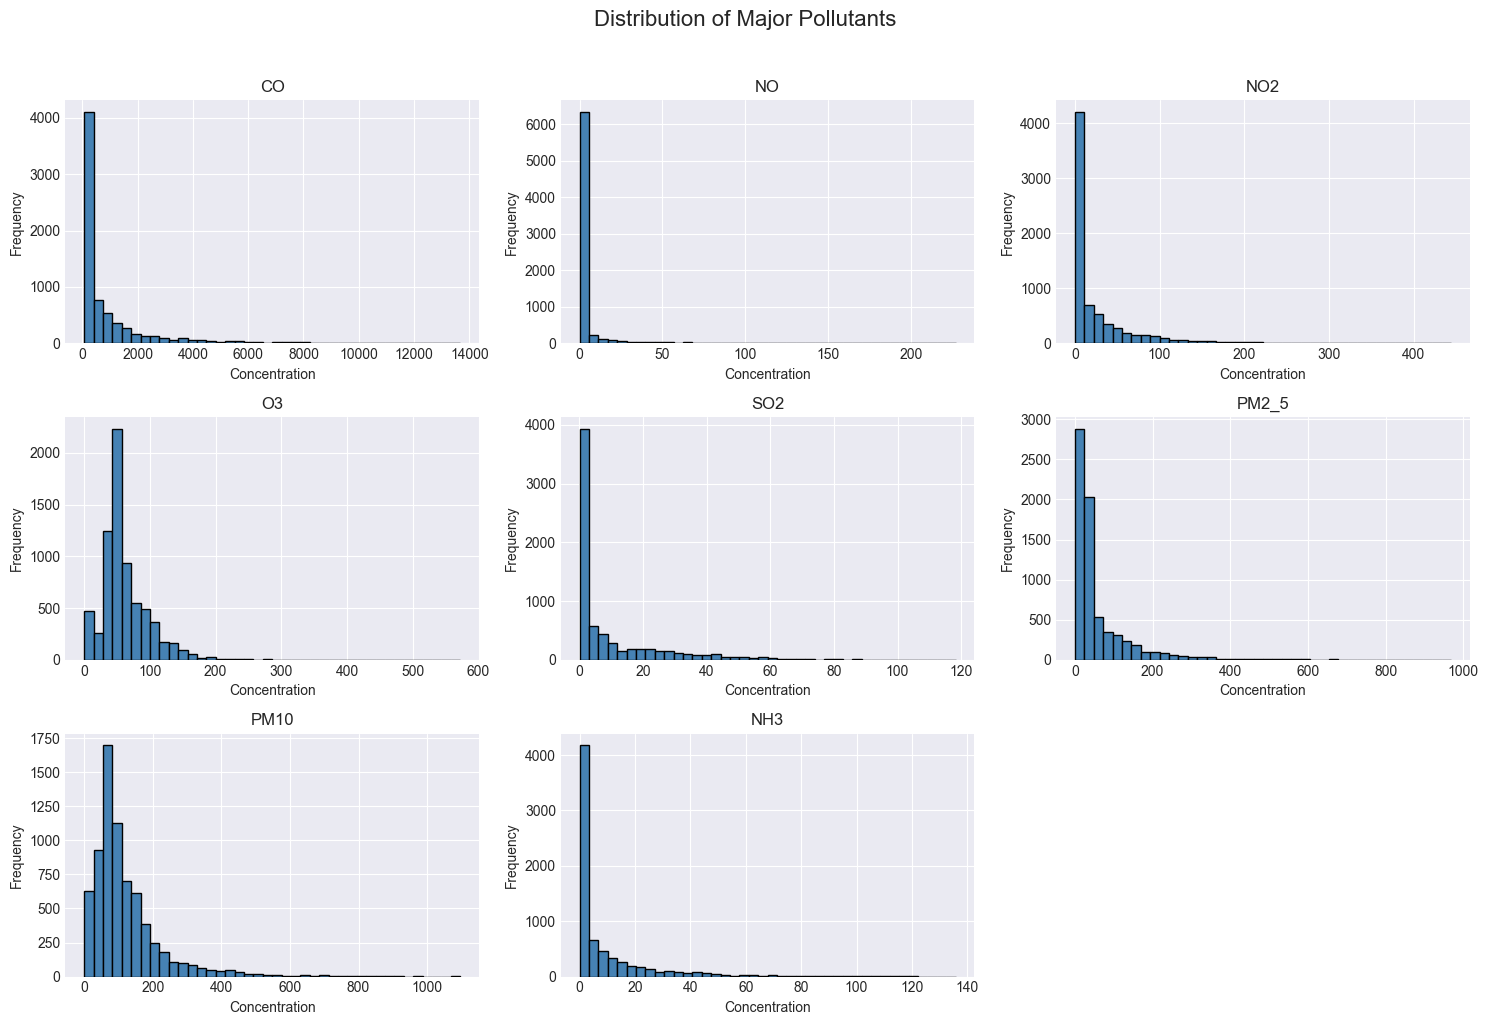

In [12]:
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

plt.figure(figsize=(15, 10))
for i, col in enumerate(pollutants, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[col], bins=40, color='steelblue', edgecolor='black')
    plt.title(col.upper())
    plt.xlabel('Concentration')
    plt.ylabel('Frequency')

plt.suptitle('Distribution of Major Pollutants', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### Interpretation of Pollutant Concentration Distributions

**Overall Pattern:**
- All pollutants (CO, NO, NO₂, SO₂, PM₂.₅, PM₁₀, O₃, NH₃) show **right-skewed distributions** — 
  meaning most concentrations are low, but there are occasional high spikes.
- This pattern is typical for urban air quality, where emissions rise sharply during traffic peaks or weather inversions.

**Gaseous Pollutants:**
- **CO, NO, NO₂, SO₂, and NH₃** are mostly concentrated near zero, with a few extreme outliers.
- Indicates generally low baseline pollution interrupted by short-term emission events.

**Particulate Matter:**
- **PM₂.₅ and PM₁₀** have wider and heavier tails — these pollutants reach higher concentrations more often.
- Suggests significant influence from vehicular emissions, dust, and biomass burning.

**Ozone (O₃):**
- Most frequent values lie between **50–100 µg/m³**, showing moderate background levels.
- Less extreme variability than other pollutants, implying more stable formation conditions.

**Summary:**
- Pollutants exhibit a typical urban pollution pattern: mostly clean periods with occasional high spikes.
- Particulate matter (PM₂.₅, PM₁₀) likely drives AQI deterioration the most.
"""

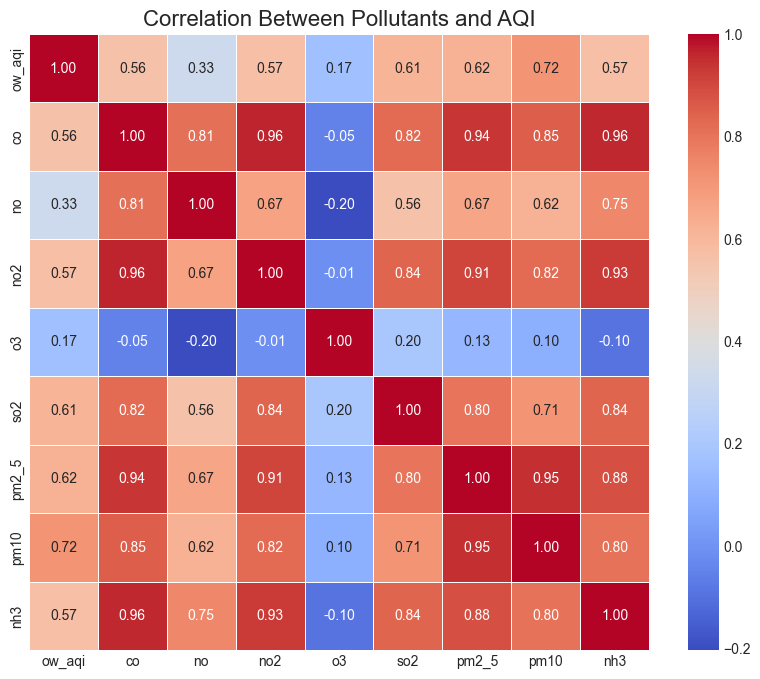

In [13]:
plt.figure(figsize=(10, 8))
corr = df[['ow_aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Pollutants and AQI', fontsize=16)
plt.show()

### Interpretation of Correlation Heatmap

**1. AQI Correlations:**
- **Overall AQI (ow_aqi)** correlates strongly with **PM₁₀ (0.72)**, **PM₂.₅ (0.62)**, and **SO₂ (0.61)**,
  showing that particulate matter and sulfur dioxide have the greatest impact on air quality.
- Moderate correlations with **CO (0.56)** and **NH₃ (0.57)** indicate additional influence from
  combustion and agricultural sources.
- **O₃ (0.17)** has a weak correlation with AQI, suggesting it behaves differently from the other pollutants.

**2. Pollutant Inter-Correlations:**
- **CO, NO₂, NH₃, and PM pollutants** are highly inter-correlated (>0.9), meaning they likely originate
  from similar sources such as vehicle emissions and fuel burning.
- **SO₂** also shows strong relationships with CO, NO₂, and particulate matter, consistent with
  industrial or combustion origins.
- **O₃** tends to have weak or slightly negative correlations with these pollutants, reflecting its
  different formation process dependent on sunlight and photochemical reactions.

**3. Key Insights:**
- **Particulate matter (PM₂.₅, PM₁₀)** are the strongest drivers of AQI levels.
- Reducing traffic and industrial emissions can improve multiple pollutant levels simultaneously.
- Ozone pollution requires **targeted strategies** since its behavior differs from other pollutants

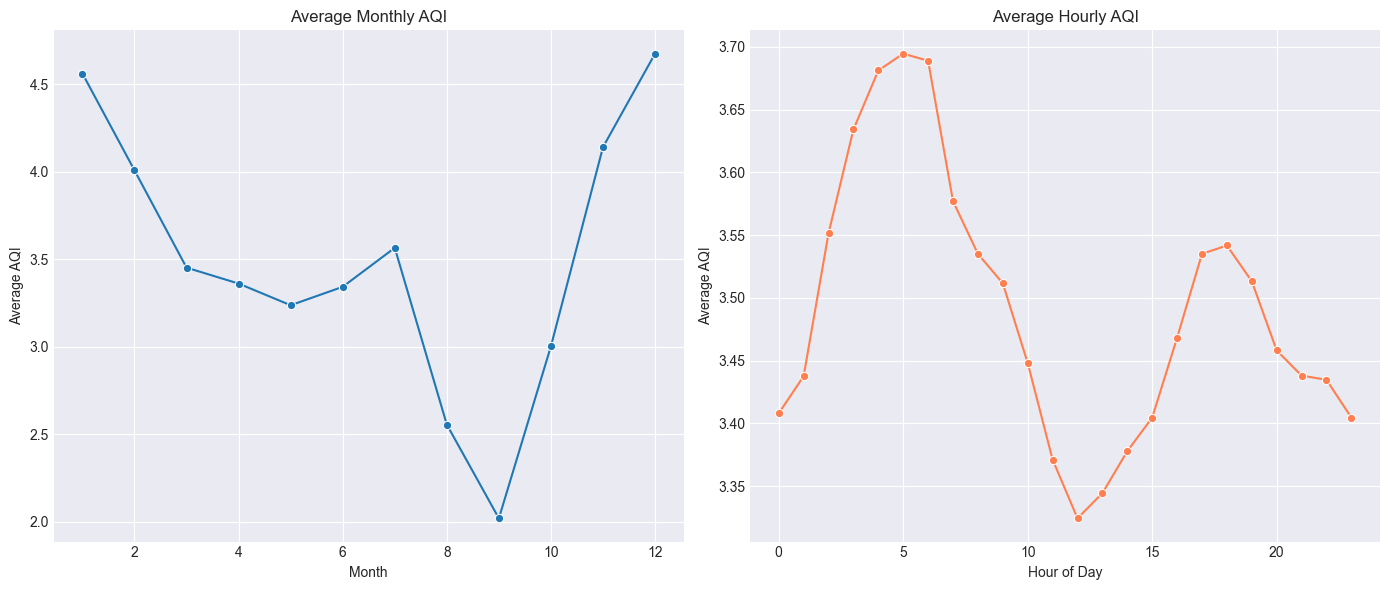

In [17]:
# Average AQI by month
monthly_aqi = df.groupby('month')['ow_aqi'].mean()

# Average AQI by hour
hourly_aqi = df.groupby('hour')['ow_aqi'].mean()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x=monthly_aqi.index, y=monthly_aqi.values, marker='o')
plt.title("Average Monthly AQI")
plt.xlabel("Month")
plt.ylabel("Average AQI")

plt.subplot(1, 2, 2)
sns.lineplot(x=hourly_aqi.index, y=hourly_aqi.values, marker='o', color='coral')
plt.title("Average Hourly AQI")
plt.xlabel("Hour of Day")
plt.ylabel("Average AQI")

plt.tight_layout()
plt.show()


#  Interpretation of AQI Trends

1. Average Monthly AQI:
   - AQI peaks during January and December, indicating poorer air quality in winter.
   - The lowest AQI values occur around August–September, suggesting cleaner air in late summer.
   - This seasonal trend may be influenced by weather conditions, heating emissions, and pollutant dispersion.

2. Average Hourly AQI:
   - AQI tends to be highest in early morning hours (4–6 AM), likely due to limited air circulation overnight.
   - It decreases around midday (11 AM–2 PM) as temperature and wind speed increase.
   - A moderate rise occurs again in the evening (5–8 PM), corresponding with peak traffic activity.

Overall, both charts reveal clear temporal patterns in air quality, influenced by weather and human behavior.


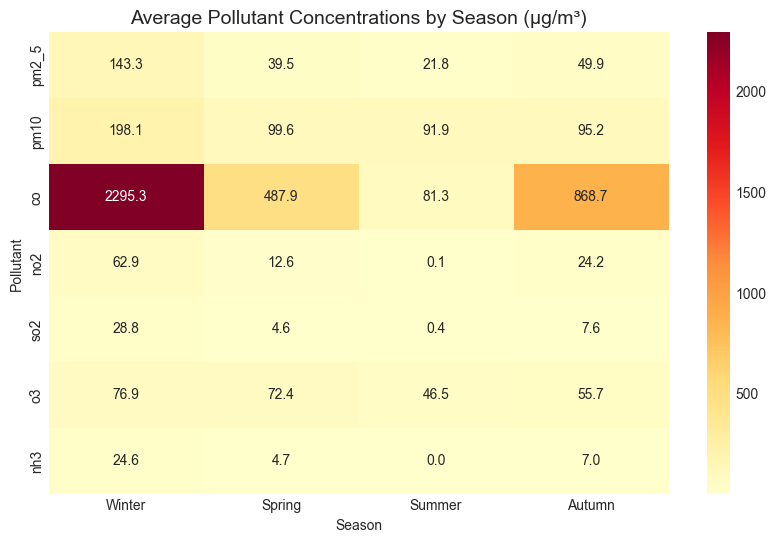

In [19]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)
seasonal_means = df.groupby('season')[['pm2_5', 'pm10', 'co', 'no2', 'so2', 'o3', 'nh3']].mean()
seasonal_means = seasonal_means.reindex(['Winter', 'Spring', 'Summer', 'Autumn'])

plt.figure(figsize=(10,6))
sns.heatmap(seasonal_means.T, cmap="YlOrRd", annot=True, fmt=".1f")
plt.title("Average Pollutant Concentrations by Season (µg/m³)", fontsize=14)
plt.ylabel("Pollutant")
plt.xlabel("Season")
plt.show()


# Interpretation of Average Pollutant Concentrations by Season

Interpretation:

1. Winter:
   - Shows the highest pollutant levels overall.
   - CO (2295.3 µg/m³) and PM10 (198.1 µg/m³) dominate, suggesting strong combustion-related pollution.
   - Cold and stagnant weather may trap pollutants near the ground.

2. Spring:
   - Sharp decline in most pollutants, especially CO and PM2.5.
   - Indicates cleaner air as weather improves and emissions decrease.

3. Summer:
   - Lowest pollution levels recorded across nearly all pollutants.
   - Enhanced dispersion and reduced heating/vehicle emissions likely contribute.

4. Autumn:
   - Pollution rises again, possibly due to dry air, crop burning, and reduced rainfall.

Overall Trend:
   Winter > Autumn > Spring > Summer in terms of average pollutant concentrations.


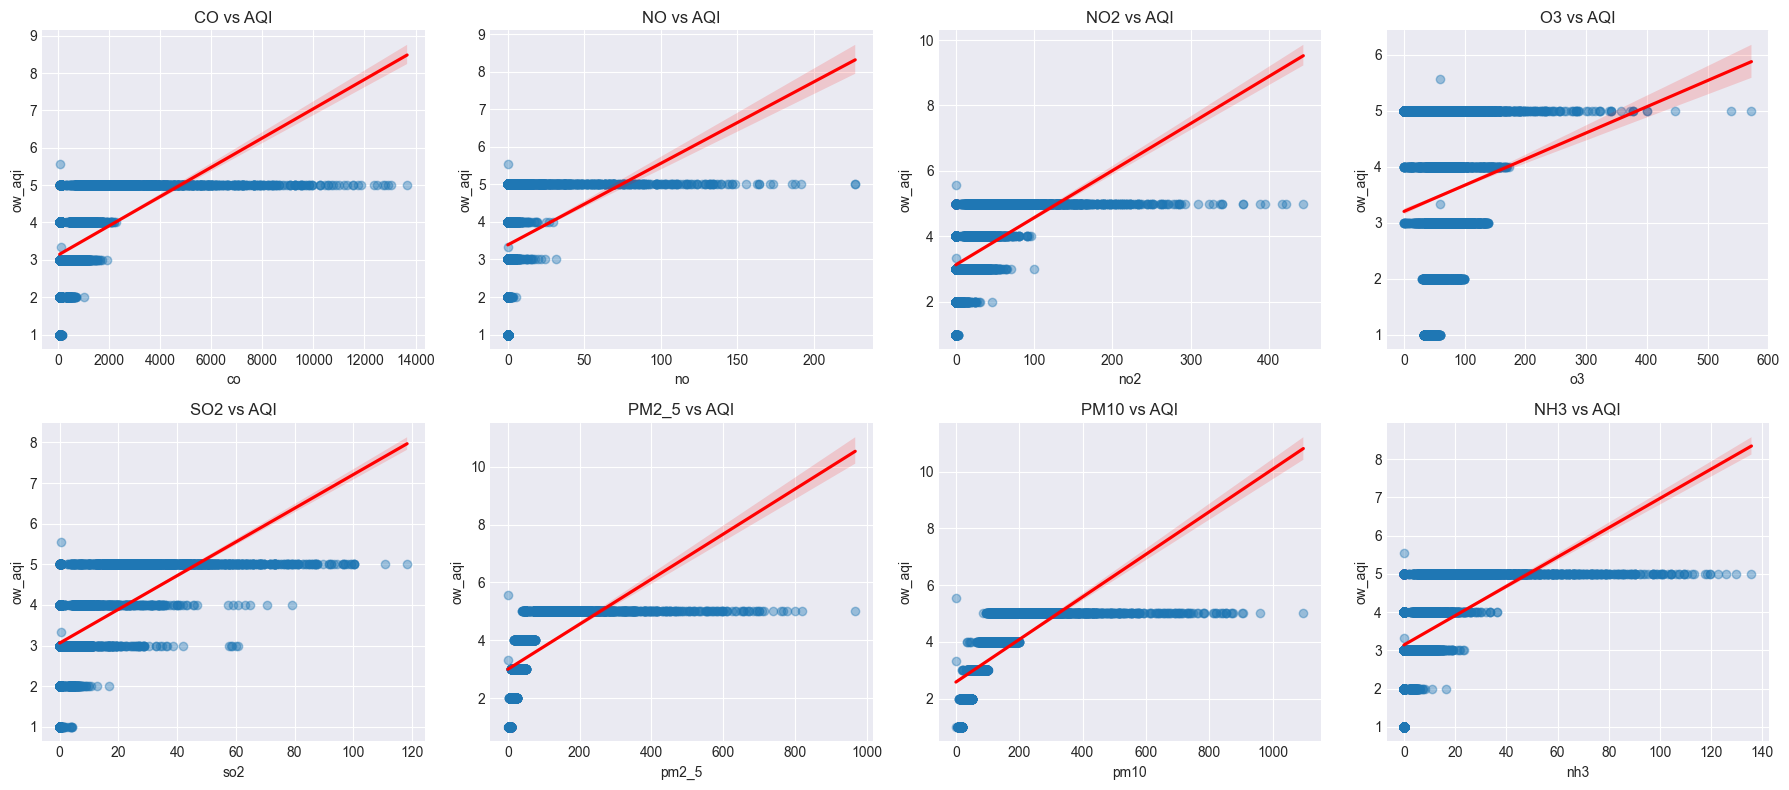

In [21]:
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(pollutants):
    sns.regplot(data=df, x=col, y='ow_aqi', ax=axes[i], scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
    axes[i].set_title(f'{col.upper()} vs AQI')

plt.tight_layout()
plt.show()


### Interpretation of Pollutant vs AQI Relationships

The plots above illustrate the relationships between individual air pollutants and the overall Air Quality Index (AQI). Each subplot shows a scatter distribution with a red regression line representing the general trend.

- **CO, NO, NO₂, O₃, SO₂, PM₂.₅, PM₁₀, and NH₃** all exhibit a **positive correlation** with AQI, meaning that as pollutant concentrations increase, the AQI value tends to rise as well.
- The **steeper slopes** for **PM₂.₅, PM₁₀, and NO₂** suggest that these pollutants have a **stronger impact** on AQI compared to others.
- The spread of data points indicates some variability, but the overall trendlines confirm that higher pollutant levels generally correspond to poorer air quality.
- This aligns with environmental expectations, where particulate matter and nitrogen oxides are major contributors to urban air pollution and higher AQI values.

**Conclusion:**  
All pollutants show a positive relationship with AQI, reinforcing their collective influence on air quality degradation, with PM₂.₅ and NO₂ being particularly significant contributors.


In [26]:
# Describe numeric columns only
desc = df.describe().T
print(desc)

# Calculate IQR only for numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outlier_summary = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print("\nPotential Outliers (Count per Column):")
print(outlier_summary)


           count                           mean                  min  \
datetime    7171  2025-04-19 07:48:12.650955264  2024-10-17 09:00:00   
ow_aqi    7171.0                        3.49099                  1.0   
co        7171.0                     936.238271                68.22   
no        7171.0                       4.679561                  0.0   
no2       7171.0                      25.023782                 0.02   
o3        7171.0                      62.505372                  0.0   
so2       7171.0                      10.361963                 0.06   
pm2_5     7171.0                      63.699138                  0.0   
pm10      7171.0                      121.19053                  0.0   
nh3       7171.0                       9.081381                  0.0   
year      7171.0                    2024.787059               2024.0   
month     7171.0                       6.636592                  1.0   
day       7171.0                       15.90615                 

### Interpretation of Outlier Analysis

1. **General Pattern:**
   - Outliers are present across nearly all pollutant columns, which is typical for environmental data.
   - AQI (`ow_aqi`) shows 382 outliers, representing genuine periods of air quality fluctuation.

2. **Major Outlier Pollutants:**
   - High counts observed for **NO (1674)**, **PM₂.₅ (809)**, **CO (790)**, **NH₃ (772)**, and **SO₂ (666)**.
   - These indicate sharp short-term pollution spikes from traffic, fuel combustion, or weather-related events.

3. **Moderate Outlier Presence:**
   - **NO₂ (720)**, **PM₁₀ (498)**, and **O₃ (437)** show moderate variability, suggesting episodic but less extreme pollution levels.

4. **Interpretation:**
   - Outliers reflect **real environmental behavior**, not noise or error.
   - They should be **retained** to preserve meaningful variations in pollution intensity.

**Summary:**  
Outliers in pollutants like **NO, CO, PM₂.₅, and NH₃** highlight significant but genuine air quality fluctuations in Karachi, crucial for understanding pollution dynamics and health risks.
